# Cleaning Phase

# import important packages

In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [3]:
df = pd.read_csv("test.csv")

In [4]:
df.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73
1,1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59
2,2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26
3,3,"Single Male with three children, education: pa...",M10da_YU,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,Deluxe,8.82 Millions,4.41 Millions,28.0543,25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58
4,4,"Single Male with two children, education: high...",L05es_CA,"Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,4.32 Millions,1.9872 Millions,23.5482,20.6410,2.9072,no,30K+,2193.97,1320.15,523.32,348.85


# information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19942 non-null  int64  
 1   Person Description             19942 non-null  object 
 2   Place Code                     19942 non-null  object 
 3   Customer Order                 19942 non-null  object 
 4   Additional Features in market  19942 non-null  object 
 5   Promotion Name                 19916 non-null  object 
 6   Store Kind                     19914 non-null  object 
 7   Store Sales                    19942 non-null  object 
 8   Store Cost                     19942 non-null  object 
 9   Gross Weight                   18959 non-null  float64
 10  Net Weight                     18924 non-null  float64
 11  Package Weight                 19942 non-null  float64
 12  Is Recyclable?                 19942 non-null 

# the descption of data

In [6]:
df.describe()

,Unnamed: 0,Gross Weight,Net Weight,Package Weight,Store Area,Grocery Area,Frozen Area,Meat Area
count,19942.00000,18959.000000,18924.000000,19942.000000,18946.000000,18900.000000,18981.000000,18967.000000
mean,9970.50000,20.081932,17.185442,2.921236,2602.295714,1780.441371,494.490102,329.654561
std,5756.90387,6.712775,6.800127,1.014127,532.042036,371.638284,147.539135,98.284822
min,0.00000,8.721600,4.433500,1.453600,1882.700000,1233.080000,227.800000,149.900000
25%,4985.25000,14.114400,11.294400,1.599000,2189.290000,1508.000000,440.920000,293.405000
50%,9970.50000,19.768900,16.861700,2.907200,2572.860000,1734.500000,470.270000,313.550000
75%,14955.75000,25.874000,23.257500,3.052500,2865.170000,2054.085000,593.930000,394.215000
max,19941.00000,31.833700,30.234700,4.506100,3692.880000,2822.670000,855.220000,570.750000


# check missing values

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                          0
Person Description                  0
Place Code                          0
Customer Order                      0
Additional Features in market       0
Promotion Name                     26
Store Kind                         28
Store Sales                         0
Store Cost                          0
Gross Weight                      983
Net Weight                       1018
Package Weight                      0
Is Recyclable?                      0
Yearly Income                       0
Store Area                        996
Grocery Area                     1042
Frozen Area                       961
Meat Area                         975
dtype: int64


# check duplicates and remove it

In [8]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

# convert sales to numeric 

In [9]:
df['Store Sales'] = df['Store Sales'].str.replace(' Millions', '', regex=False).astype(float)*1000
df['Store Sales']

0        11760.0
1         2160.0
2         1830.0
3         8820.0
4         4320.0
          ...   
19937     4460.0
19938     3810.0
19939     2140.0
19940     3520.0
19941     4620.0
Name: Store Sales, Length: 19942, dtype: float64

# fill nan values with best values

In [10]:
df['Store Area'].fillna(df['Store Area'].mean(),inplace=True)
df['Grocery Area'].fillna(df['Grocery Area'].mean(),inplace=True)
df['Meat Area'].fillna(df['Meat Area'].mean(),inplace=True)
df['Frozen Area'].fillna(df['Frozen Area'].mean(),inplace=True)
df['Net Weight'].fillna(df['Net Weight'].mean(),inplace=True)
df['Gross Weight'].fillna(df['Gross Weight'].mean(),inplace=True)

C:\Users\Eng Abd Allah\AppData\Local\Temp\ipykernel_10696\284123370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Store Area'].fillna(df['Store Area'].mean(),inplace=True)
C:\Users\Eng Abd Allah\AppData\Local\Temp\ipykernel_10696\284123370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [11]:
df['Store Kind'].unique()

array(['Gourmet', 'Deluxe', 'Supermarket', 'Small Grocery', 'Mid-Size',
       nan], dtype=object)

In [12]:
o= ['Supermarket','Deluxe','Small Grocery','Gourmet']
nan_kind = df['Store Kind'].isnull()
df.loc[nan_kind , 'Store Kind'] = np.random.choice(o)

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                        0
Person Description                0
Place Code                        0
Customer Order                    0
Additional Features in market     0
Promotion Name                   26
Store Kind                        0
Store Sales                       0
Store Cost                        0
Gross Weight                      0
Net Weight                        0
Package Weight                    0
Is Recyclable?                    0
Yearly Income                     0
Store Area                        0
Grocery Area                      0
Frozen Area                       0
Meat Area                         0
dtype: int64


# convert column is recycable into boolean 

In [14]:
df["Is Recyclable?"] = df["Is Recyclable?"].replace({'yes':'true','no':'False'})
df["Is Recyclable?"]

0         true
1        False
2        False
3        False
4        False
         ...  
19937    False
19938    False
19939     true
19940     true
19941    False
Name: Is Recyclable?, Length: 19942, dtype: object

# convert yearly income

In [15]:
df['Yearly Income'] = df['Yearly Income'].str.replace('K+', '', regex=False)
df['Yearly Income']

0         50
1         70
2        130
3         10
4         30
        ... 
19937     10
19938     10
19939     50
19940     70
19941     30
Name: Yearly Income, Length: 19942, dtype: object

# drop columns with not useful

In [16]:
df = df.drop(columns=['Unnamed: 0', 'Person Description', 'Customer Order', 'Additional Features in market'])
df

,Place Code,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,B06ls_CA,Fantastic Discounts,Gourmet,11760.0,4.704 Millions,31.8337,28.7811,3.0525,true,50,2201.06,1424.850000,465.54,308.73
1,S01em_OR,Bag Stuffer,Deluxe,2160.0,0.6696 Millions,29.9440,27.0368,2.9072,False,70,2577.16,1735.170000,505.07,336.59
2,H11go_ZA,Pick Your Savings,Deluxe,1830.0,0.8235 Millions,29.2172,26.3100,2.9072,False,130,2837.58,2038.110000,481.98,321.26
3,M10da_YU,Price Winners,Deluxe,8820.0,4.41 Millions,28.0543,25.0018,3.0525,False,10,2859.04,1871.160000,593.93,394.58
4,L05es_CA,Dollar Days,Supermarket,4320.0,1.9872 Millions,23.5482,20.6410,2.9072,False,30,2193.97,1320.150000,523.32,348.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,H11go_ZA,Two for One,Deluxe,4460.0,1.9624 Millions,11.1200,8.2128,2.9072,False,10,2839.33,2038.110000,481.98,321.26
19938,S03le_WA,Best Price Savers,Supermarket,3810.0,1.3335 Millions,20.6410,17.5885,3.0525,False,10,1970.94,1780.441371,440.92,295.66
19939,G16ra_JA,Best Savings,Small Grocery,2140.0,0.749 Millions,23.1121,20.0596,3.0525,true,50,2288.65,1394.660000,534.29,355.98
19940,S01em_OR,Bag Stuffer,Deluxe,3520.0,1.1616 Millions,16.2802,13.3585,2.9217,true,70,2572.86,1734.500000,503.07,335.38


# Now Visualization Phase

# create Count Plot for Store Kind with palette and hue adjustments (using scatter)

In [17]:
store_kind_counts = df['Store Kind'].value_counts().reset_index()
store_kind_counts.columns = ['Store Kind', 'Count']

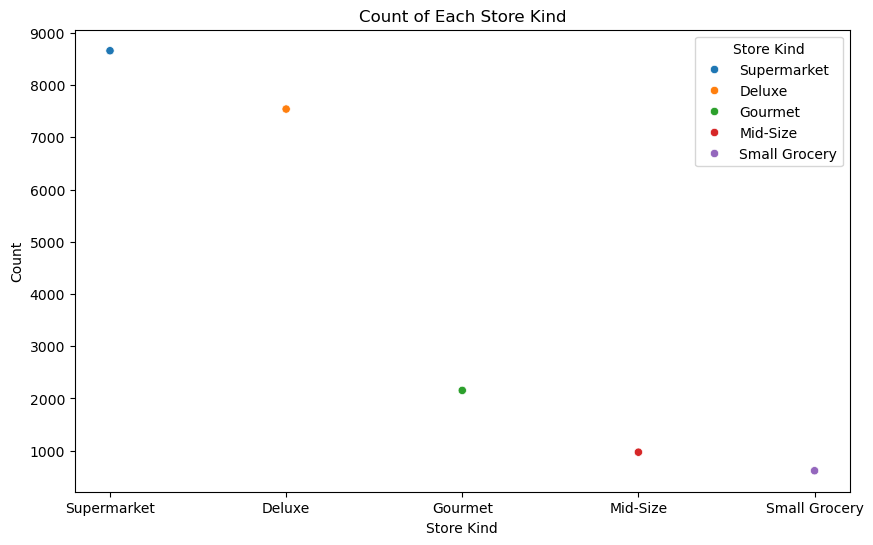

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_kind_counts,x='Store Kind', y='Count',hue='Store Kind',legend=True)
plt.title("Count of Each Store Kind")
plt.xlabel("Store Kind")
plt.ylabel("Count")

plt.show()

# Lineplot of Store Sales vs Yearly Income by Store Kind

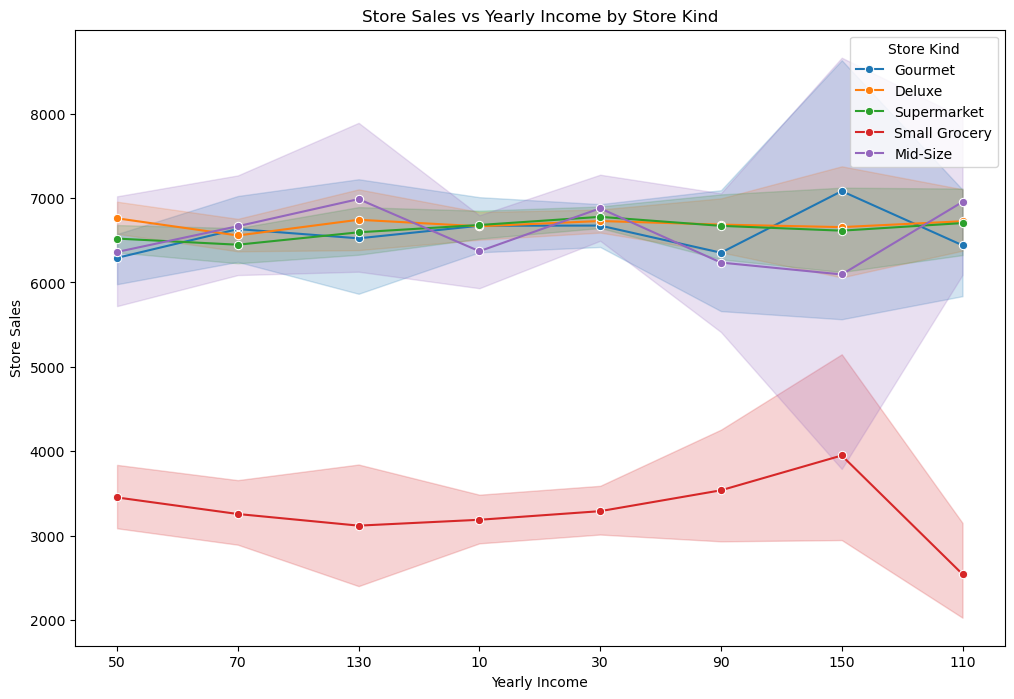

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df,x='Yearly Income', y='Store Sales',hue='Store Kind',marker="o")
plt.title("Store Sales vs Yearly Income by Store Kind")
plt.xlabel("Yearly Income")
plt.ylabel("Store Sales")

plt.show()

# Histogram for Store Sales, Yearly Income, and Store Cost

In [20]:
df['Store Cost'] = pd.to_numeric(df['Store Cost'].str.replace(' Millions', '', regex=False))

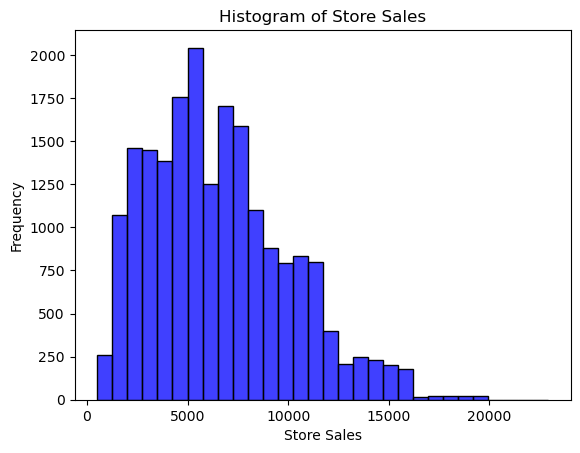

In [21]:
sns.histplot(df['Store Sales'], bins=30,color='blue')
plt.title('Histogram of Store Sales')
plt.xlabel('Store Sales')
plt.ylabel('Frequency')

plt.show()

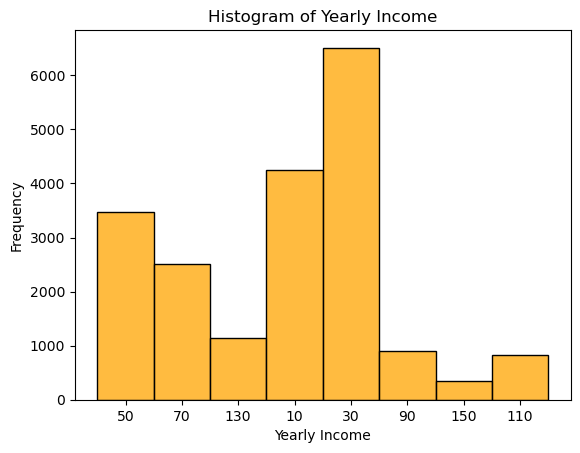

In [22]:
sns.histplot(df['Yearly Income'], bins=30,color='orange')
plt.title('Histogram of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')

plt.show()

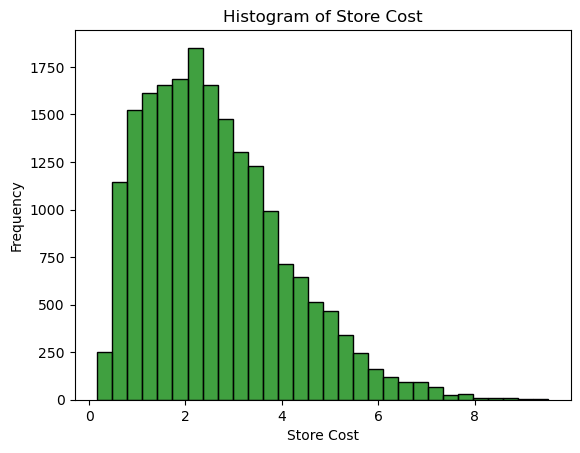

In [23]:
sns.histplot(df['Store Cost'], bins=30,color='green')
plt.title('Histogram of Store Cost')
plt.xlabel('Store Cost')
plt.ylabel('Frequency')

plt.show()

# using bar plot , represent store kind , store sales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


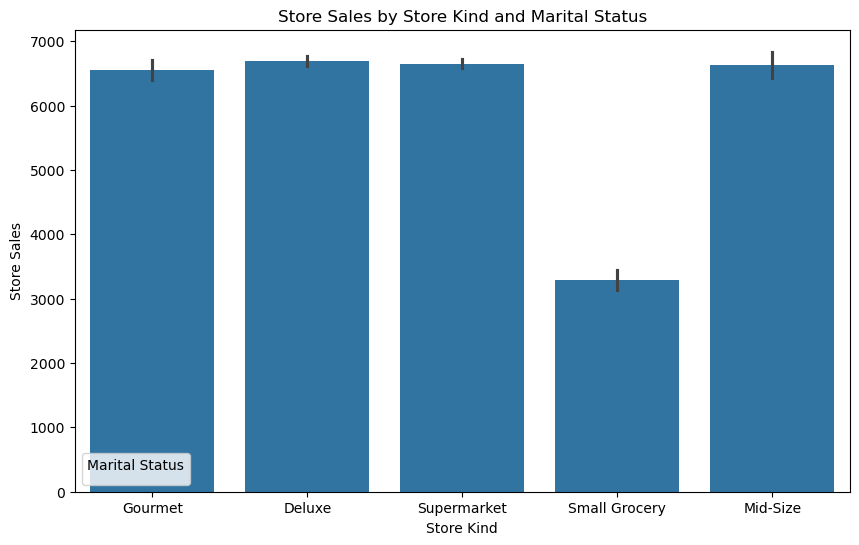

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Store Kind', y='Store Sales' )

plt.title('Store Sales by Store Kind and Marital Status')
plt.xlabel('Store Kind')
plt.ylabel('Store Sales')
plt.legend(title='Marital Status')
plt.show()

# make a Distribution of Store Sales

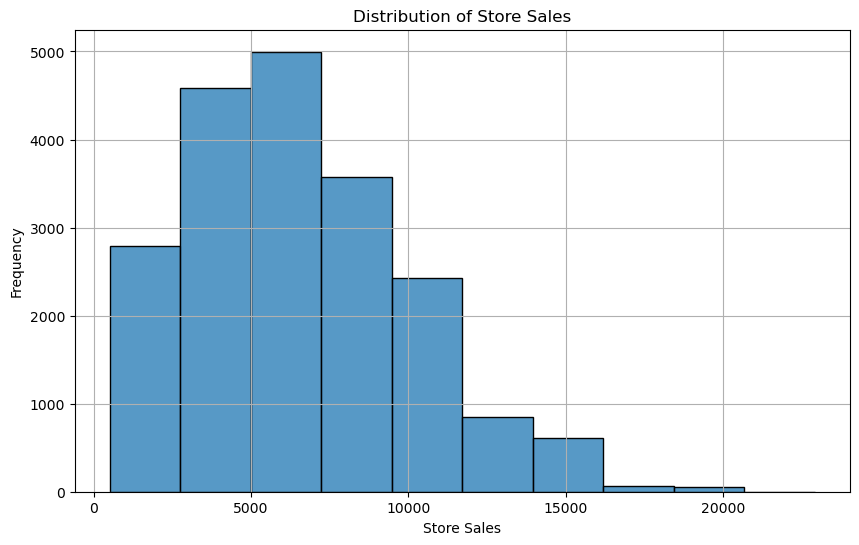

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Store Sales'], bins=10)

plt.title('Distribution of Store Sales')
plt.xlabel('Store Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of Yearly Income vs Store Sales

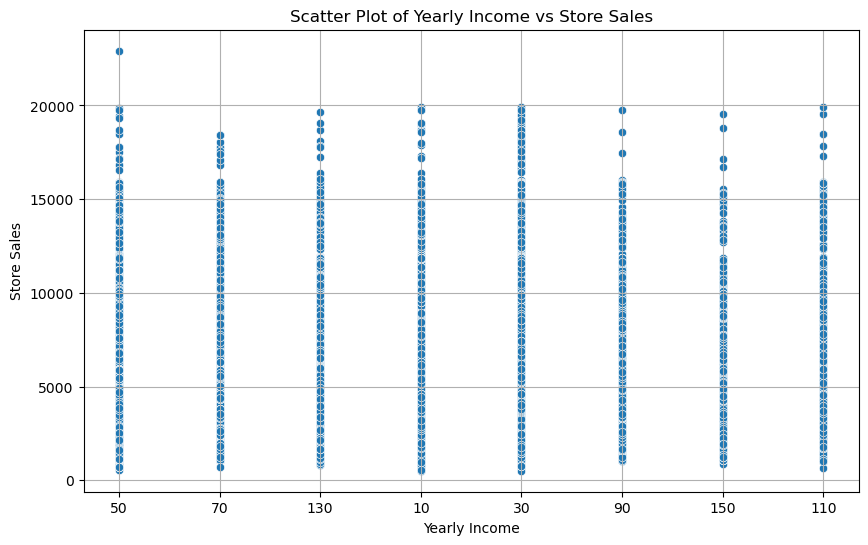

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Yearly Income', y='Store Sales')

plt.title('Scatter Plot of Yearly Income vs Store Sales')
plt.xlabel('Yearly Income')
plt.ylabel('Store Sales')
plt.grid(True)
plt.show()

# Now Machine learning phase

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report , mean_squared_error

### Select Features and Target

In [28]:
df["Is Recyclable?"] = df["Is Recyclable?"].replace({'true':1,'False':0})

C:\Users\Eng Abd Allah\AppData\Local\Temp\ipykernel_10696\1971861602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Is Recyclable?"] = df["Is Recyclable?"].replace({'true':1,'False':0})


In [29]:
y = df['Store Cost']
x = df[['Store Sales', 'Package Weight', 'Yearly Income', 'Store Area', 'Is Recyclable?']]

###  Split the Data into Training and Testing Sets

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (15953, 5)
X_test shape: (3989, 5)


### Building the Linear Regression Model

In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Make Predictions and Evaluate the Model

In [32]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R Squared Score:", r2)

Mean Squared Error: 0.18952967979576207
R Squared Score: 0.913459330857974
